# Naïve Bayes, Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA)

### Дабеска Мила 193263

&nbsp;

## Import the required libraries

In [1]:
import matplotlib.pyplot as plt #Libraries for visualization
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np #Library for numerical calculations
from scipy import stats #Library for statistical analysis 
from sklearn import datasets #Libraries for machine learning
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

## Load the Heart Disease Dataset
Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
column_names = np.loadtxt(open("heart.csv", "rb"), delimiter=",", max_rows=1, dtype = str) 
data = np.loadtxt(open("heart.csv", "rb"), delimiter=",", skiprows=1, dtype = str)

dataset=pd.read_csv("heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X = data[:,:-1].astype(np.float) # input vectors(every column except the last one which usually represents the class)
y = data[:,-1].astype(np.int) # last column of the data as the target classes

target_names = ['No disease', 'Disease']
feature_names = column_names[0:-1]

number_of_features = X.shape[1]
number_of_classes = len(np.unique(y))

print("Number and names of classes: ", number_of_classes, target_names)  
print("\nNumber and names of features: ", number_of_features, feature_names)  
print("\nNumber of data points: ", X.shape[0])

Number and names of classes:  2 ['No disease', 'Disease']

Number and names of features:  13 ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']

Number of data points:  1025


In [7]:
print(f"Input vectors: {X}\n")
print(f"Last column: {y}")

Input vectors: [[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]

Last column: [0 0 0 ... 0 1 0]


&nbsp;

## Visualizations

In [8]:
colors = ['darkred', 'darkgreen'] #colors for plotting

### Whole data Histograms and within class Histograms

<IPython.core.display.Javascript object>


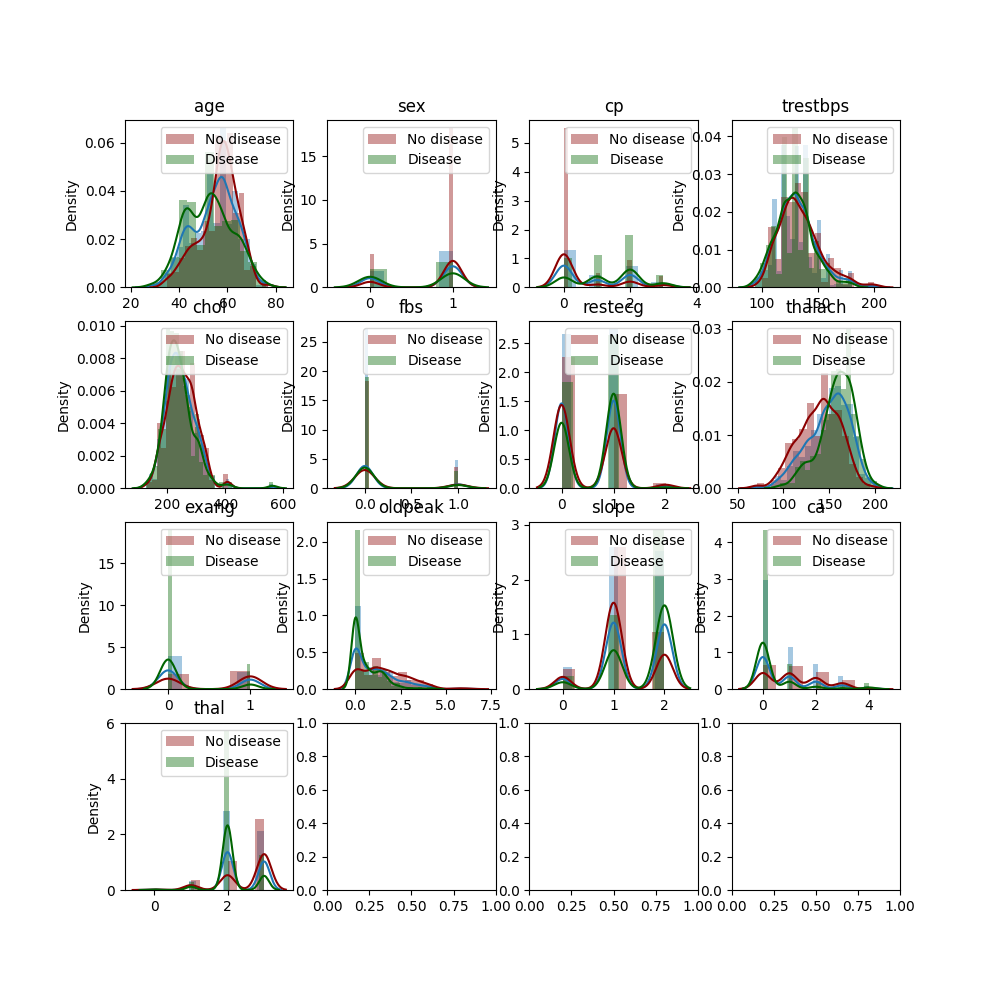

In [9]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=4, ncols=4)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(4,4, feat_i+1)
    plt.title(feature_names[feat_i]) 
    sns.distplot(X[:,feat_i]) # Once we have a specific feature, we draw the histogram of the feature's data
    for class_i in range(number_of_classes): # within-class histograms of the same feature
        sns.distplot(X[y == class_i,feat_i], color=colors[class_i], label=target_names[class_i]) 
    plt.legend()
plt.show()

### Feature scatterplots
Scatterplot ја претставува секоја податочна точка на 2-димензионален простор каде што секоја оска претставува карактеристика.

<IPython.core.display.Javascript object>


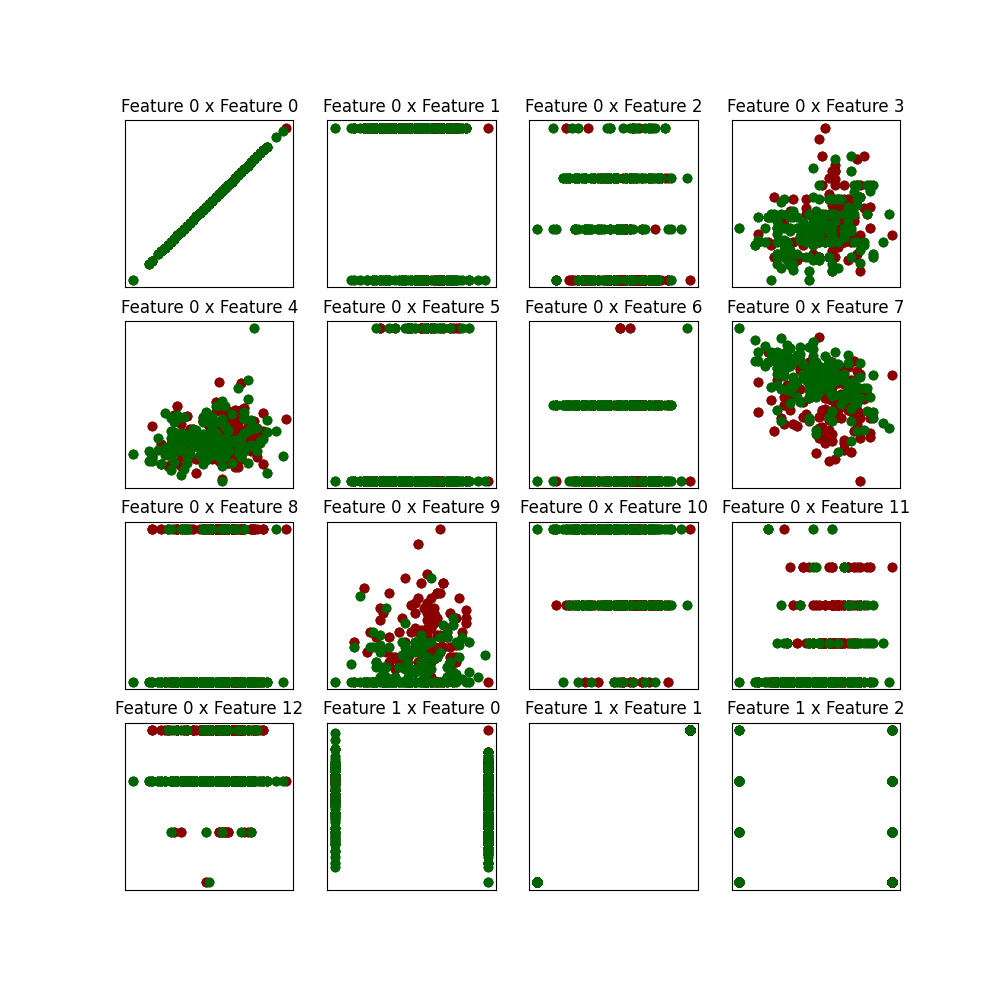

ValueError: num must be 1 <= num <= 16, not 17

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.title("Scatterplots of the Heart Disease Dataset")
fig.subplots(nrows=4, ncols=4)
for feat_i in range(number_of_features): #all pairs of features
    for feat_j in range(number_of_features):  
        ax = plt.subplot(4,4,number_of_features*feat_i + feat_j+1)
        for color, i, target_name in zip(colors, [0, 1, 2], target_names):
            plt.scatter(X[y == i, feat_i], X[y == i, feat_j], alpha=.8, color=color, label=target_name) 
        plt.xticks(())
        plt.yticks(())
        plt.title("Feature "+str(feat_i)+" x Feature "+str(feat_j))
plt.show()

### Between feature dependence
Пирсонов коефициент на корелација

<IPython.core.display.Javascript object>


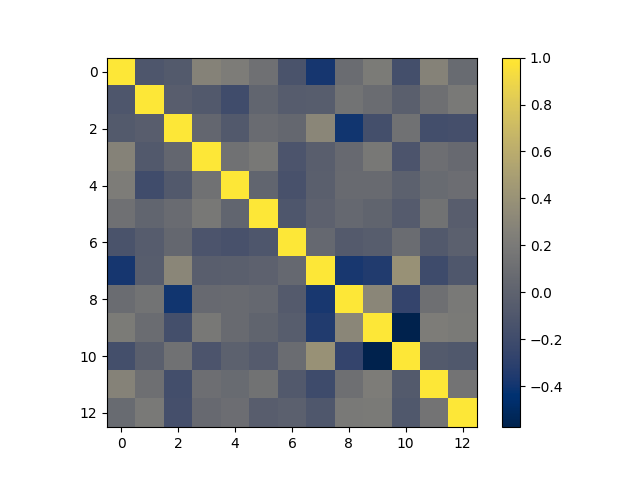

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [11]:
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): 
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "cividis") 
plt.colorbar()
plt.show()

dataset.corr() #numerically

### PCA (Principal Component Analysis)
PCA е техника за намалување на димензионалноста без надзор (unsupervised) и таа ја игнорира ознаката на класата. Се фокусира на снимање на насоката на максималната варијација во множеството податоци.

<IPython.core.display.Javascript object>


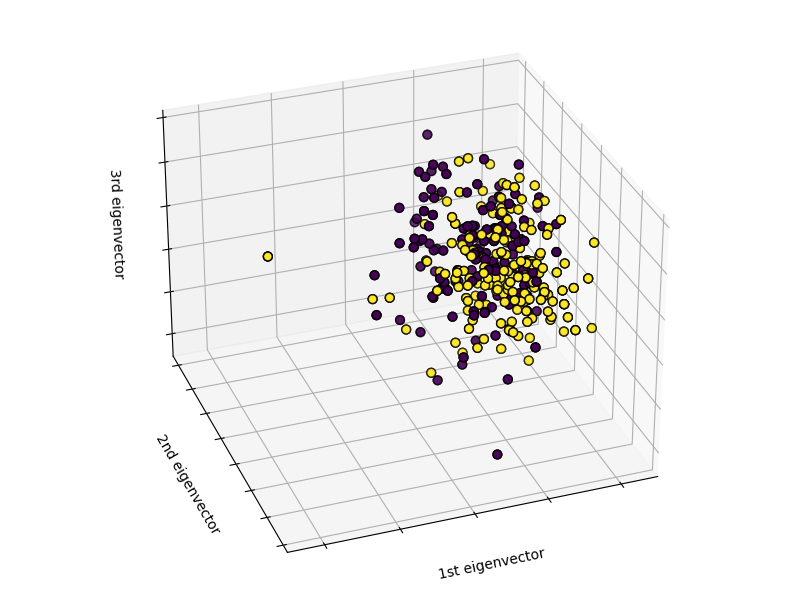

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

pca = PCA(n_components=3) #Setting the components to 3 to be represented in 3D space
X_reduced = pca.fit(X).transform(X) 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

<IPython.core.display.Javascript object>


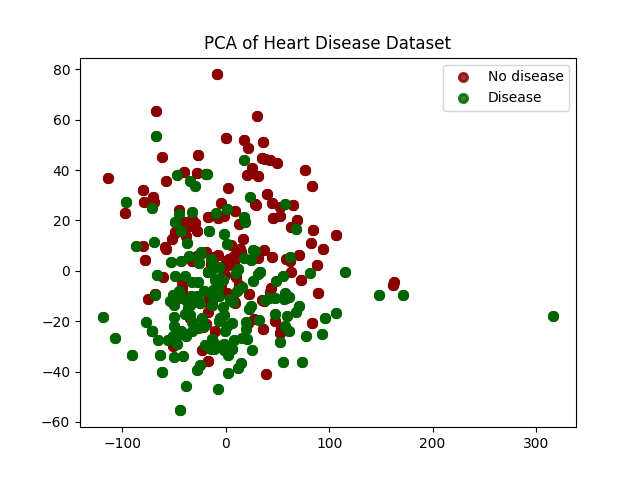

In [13]:
pca = PCA(n_components=2) #Setting the components to 2 to be represented in 2D space
X_PCA = pca.fit(X).transform(X) 

plt.figure() 
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_PCA[y == i, 0], X_PCA[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Heart Disease Dataset')
plt.show()

### LDA dimensionality reduction (Linear discriminant analysis)
LDA е надгледувана(supervised) техника за намалување на димензионалноста која исто така постигнува класификација на податоците истовремено. Се фокусира на пронаоѓање на потпростор на карактеристики што ја максимизира раздвојливоста помеѓу групите.

<IPython.core.display.Javascript object>


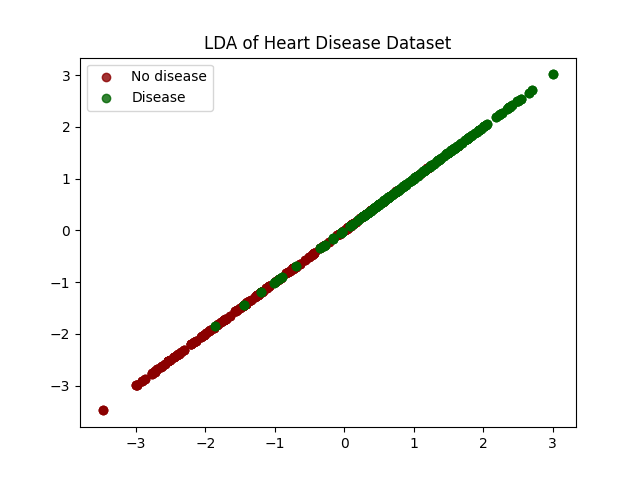

Text(0.5, 1.0, 'LDA of Heart Disease Dataset')

In [14]:
lda = LinearDiscriminantAnalysis(n_components=1) 
X_LDA = lda.fit(X, y).transform(X) 
plt.figure() 
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_LDA[y == i, 0], X_LDA[y == i, 0], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Heart Disease Dataset')

### QDA (Quadratic Discriminant Analysis)
QDA е варијанта на LDA во која се проценува индивидуална коваријансна матрица за секоја класа на набљудувања. QDA е особено корисен ако има претходно сознание дека поединечните класи покажуваат различни коваријанси.

&nbsp;

## Classification

### Splitting the dataset to a training and test set
Делење на податоците на множество за тренирање и множество за тестирање. Бидејќи бројот на точки на податоци со односот на бројот на карактеристики е голем во оваа база на податоци, можеме само да користиме 70% од оригиналните податоци како податоци за тренирање, а останатите 30% како податоци за тестирање.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.30, random_state=42) 
X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_LDA, y, test_size=0.30, random_state=42)

### Classifications on the original dataset

#### Classification using LDA
1. y_test == y_pred проценува каде ознаките на тест множеството y_test се еднакви на предвидувањата y_pred и враќа вектор од 1 (каде што се исти) и 0 (каде што се различни)
2. np.sum(y_test == y_pred) пресметува збирот на овие 1 и 0 давајќи го вкупниот број на точни предвидувања
3. len(y_test) сума ја делиме со бројот на тест лабели за да го добиеме процентот на точни предвидувања
4. np.round(np.sum(y_test == y_pred)/len(y_test),3) ја заокружуваме точноста на 3-та децимала 

In [17]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train) #model training
y_pred = lda.predict(X_test) #makes a classification of a record
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3) #compute the number_of_correct_predictions/number_of_total_predictions
print("LDA accuracy for the Heart Disease Dataset", accuracy) 

LDA accuracy for the Heart Disease Dataset 0.815


#### Classification using Naive Bayes

In [18]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy for the Heart Disease Dataset", accuracy)

Naive Bayes accuracy for the Heart Disease Dataset 0.815


#### Classification using QDA

In [19]:
qda = QuadraticDiscriminantAnalysis() 
qda.fit(X_train, y_train) 
y_pred = qda.predict(X_test) 
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("QDA accuracy for the original Heart Disease Dataset", accuracy)

QDA accuracy for the original Heart Disease Dataset 0.821


&nbsp;

### Classifications on the PCA transformed dataset
Бидејќи овие податоци (и трансформираната база на податоци LDA) се во 2D, прво можеме да ги визуелизираме податоците од тестот за да можеме да направиме некои претпоставки за тоа што ќе прават моделите или какви грешки очекуваме од моделот. По класификацијата на секој модел, можеме да ги означиме грешките и да разбереме што се случило.

<IPython.core.display.Javascript object>


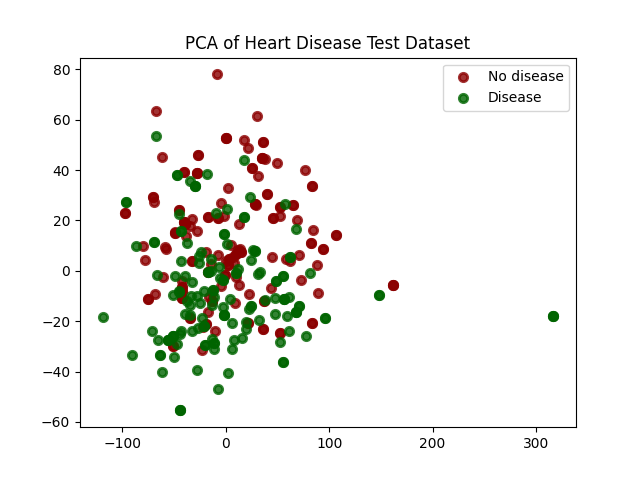

In [15]:
plt.figure() 
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Heart Disease Test Dataset')
plt.show()

#### LDA
- За да ги нацртаме погрешно погодените податоци, прво го добиваме истиот вектор y_pred==y_PCA_test каде што имаме True каде предвидувањето е точно и False ако не
- Потоа само поминуваме низ векторот и цртаме случаи каде вредноста е False (црните точки)

LDA accuracy for the PCA dimensionaly reducted Heart Disease Dataset 0.672


<IPython.core.display.Javascript object>


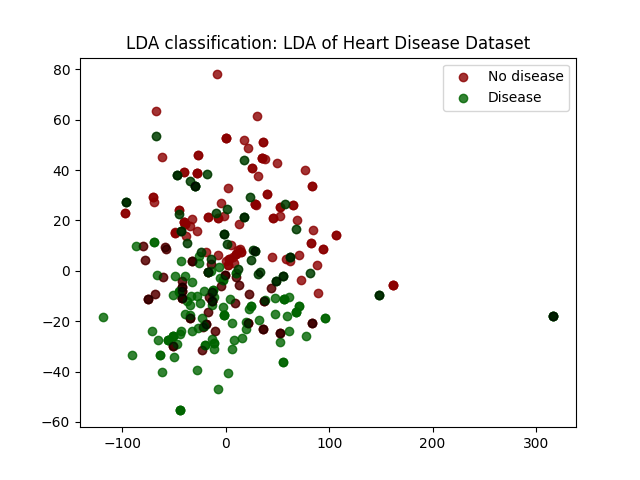

In [31]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_PCA_train, y_PCA_train)
y_pred = lda.predict(X_PCA_test)
accuracy = np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3)
print("LDA accuracy for the PCA dimensionaly reducted Heart Disease Dataset", accuracy)

plt.figure() 
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: LDA of Heart Disease Dataset')
 
incorrect = y_pred==y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==False):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.3, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

#### Naive Bayes

Naive Bayes accuracy for the PCA dimensionaly reducted Heart Disease Dataset 0.675


<IPython.core.display.Javascript object>


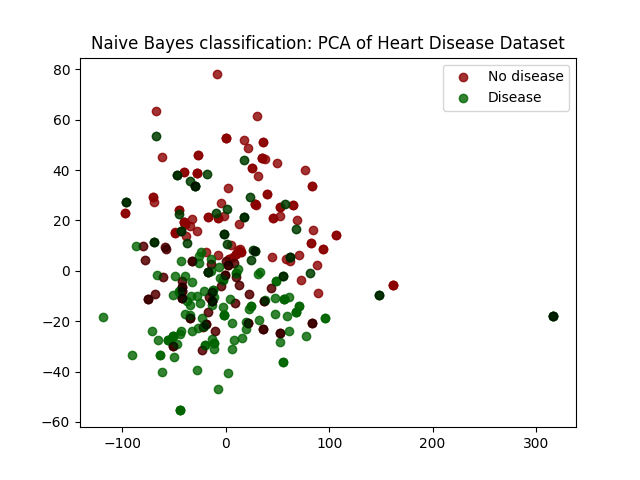

In [30]:
gnb = GaussianNB()
gnb.fit(X_PCA_train, y_PCA_train)
y_pred = gnb.predict(X_PCA_test)
print("Naive Bayes accuracy for the PCA dimensionaly reducted Heart Disease Dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('Naive Bayes classification: PCA of Heart Disease Dataset')

incorrect = y_pred!=y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.3, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

#### QDA

In [21]:
qda = QuadraticDiscriminantAnalysis() 
qda.fit(X_PCA_train, y_PCA_train) 
y_pred = qda.predict(X_PCA_test) 
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("QDA accuracy for the PCA of Heart Disease Dataset", accuracy)

QDA accuracy for the PCA of Heart Disease Dataset 0.679


&nbsp;

### Classifications on the LDA transformed dataset

#### LDA

LDA accuracy for the LDA dimensionaly reducted Heart Disease Dataset 0.812


<IPython.core.display.Javascript object>


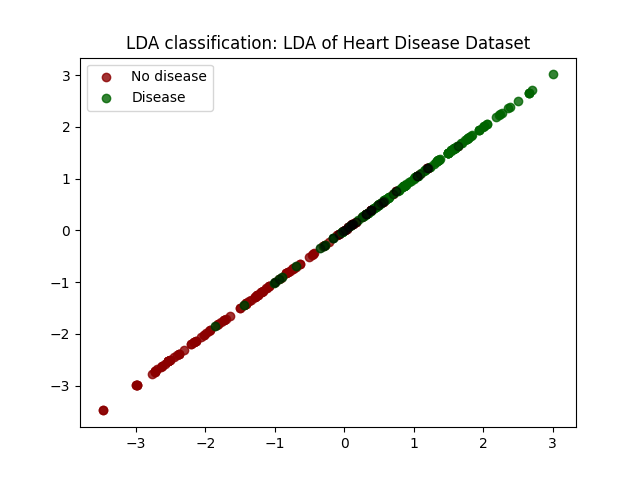

In [29]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_LDA_train, y_LDA_train)
y_pred = lda.predict(X_LDA_test)
print("LDA accuracy for the LDA dimensionaly reducted Heart Disease Dataset", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 0], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: LDA of Heart Disease Dataset')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][0], alpha=.3, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

#### Naive Bayes

Naive Bayes accuracy for the LDA dimensionaly reducted Heart Disease Dataset 0.818


<IPython.core.display.Javascript object>


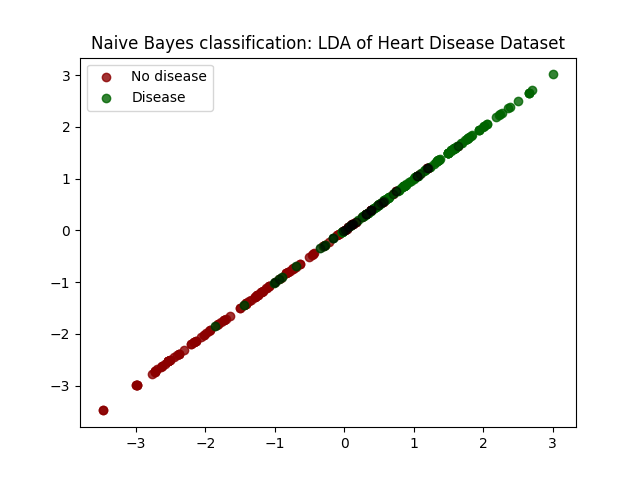

In [98]:
gnb = GaussianNB()
gnb.fit(X_LDA_train, y_LDA_train)
y_pred = gnb.predict(X_LDA_test)
print("Naive Bayes accuracy for the LDA dimensionaly reducted Heart Disease Dataset", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 0], alpha=.8, color=color,
                label=target_name)
plt.title('Naive Bayes classification: LDA of Heart Disease Dataset')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][0], alpha=.3, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

#### QDA

In [22]:
qda = QuadraticDiscriminantAnalysis() 
qda.fit(X_LDA_train, y_LDA_train) 
y_pred = qda.predict(X_LDA_test) 
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("QDA accuracy for the LDA of Heart Disease Dataset", accuracy)

QDA accuracy for the LDA of Heart Disease Dataset 0.818


&nbsp;

## Playing with Priors
Prior е дистрибуција на веројатност што претставува знаење или несигурност на податочен објект prior или пред негово набљудување. Prior веројатноста само ја поместува линијата на функцијата за одлучување кон класата со повисоко prior. Ова може да доведе до некои грешки во класите со понизок prior. Ова може да се направи и за Naive Bayes.

LDA accuracy for the PCA dimensionaly reducted Heart Disease Dataset 0.545


<IPython.core.display.Javascript object>


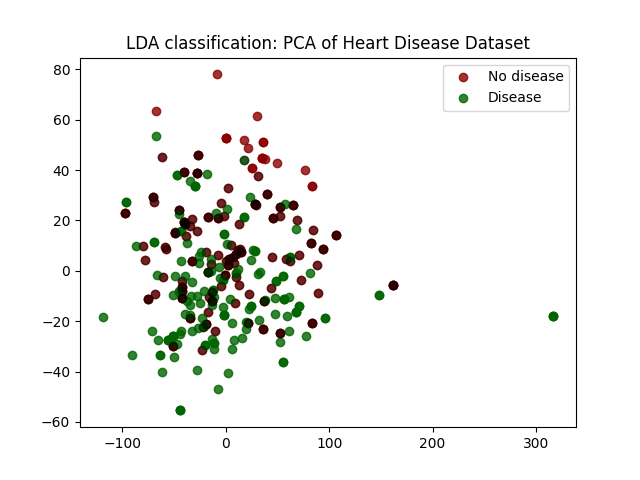

In [91]:
lda = LinearDiscriminantAnalysis(priors = [0.1,0.8])
lda.fit(X_PCA_train, y_PCA_train)
y_pred = lda.predict(X_PCA_test)
print("LDA accuracy for the PCA dimensionaly reducted Heart Disease Dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: PCA of Heart Disease Dataset')

incorrect = y_pred!=y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.3, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

LDA accuracy for the PCA dimensionaly reducted Heart Disease Dataset 0.662


<IPython.core.display.Javascript object>


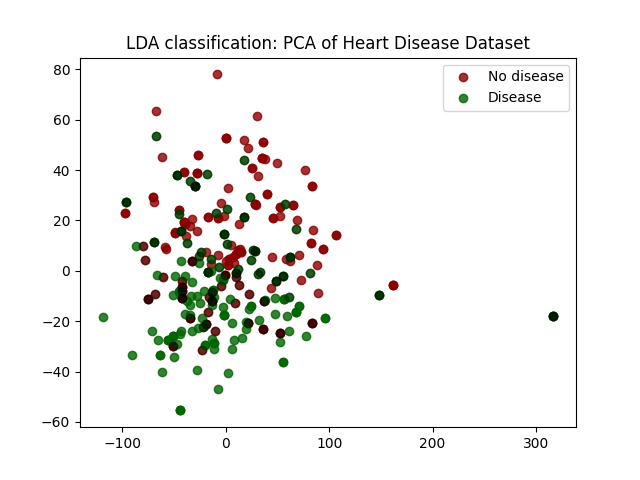

In [94]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True, priors = [0.1,0.1])
lda.fit(X_PCA_train, y_PCA_train)
y_pred = lda.predict(X_PCA_test)
print("LDA accuracy for the PCA dimensionaly reducted Heart Disease Dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classification: PCA of Heart Disease Dataset')

incorrect = y_pred!=y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.3, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

## Conclusion
* Од клацификацијата за оригиналната база на податоци моделите Naïve Bayes и Linear Discriminant Analysis (LDA) имаат иста точност.
* Од клацификацијата за PCA трансформираната база на податоци најголема точност има моделот Quadratic Discriminant Analysis (QDA), а најмала Linear Discriminant Analysis (LDA).
* Од клацификацијата за LDA трансформираната база на податоци моделите Naïve Bayes и Quadratic Discriminant Analysis (QDA) имаат иста точност.